### Accessing content in your drive


### Navigate to the location of folder ###

In [1]:
import os
os.chdir('../../src/Enviroments/ExternalEnv/RPNet')

### Importing required modules

In [2]:
### Importing basic libraries
import scipy.io
import numpy as np
import torch
from scipy import signal
# from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import random
import pandas as pd
import scipy
import pickle
import sklearn
from sklearn.preprocessing import MinMaxScaler
import warnings
import math
import csv
# from tqdm.notebook import tqdm

from scipy.signal import butter, lfilter, lfilter_zi
from pylab import plot, show, title, xlabel, ylabel, subplot

### Importing torch related libraries
# from torch.utils.data import DataLoader
# from torch.utils.data import TensorDataset
# import torch.nn as nn
# import torch.functional as F
# from torch.autograd import Variable   
# import torch.optim as optim
# from torch.optim import lr_scheduler
import datetime

### Importing Custom Libraries
# from network import IncUNet
from network_keras import IncUNet


# Preprocessing #

### Navigate to the folder containing the model and data

In [3]:
data_path = "../../../../Data/CPSC_2019/train/data"
reference_path = "../../../../Data/CPSC_2019/train/ref"

### Loading from the Mat file

In [4]:
# count = 0 
# patient_info = []
# for files in sorted(os.listdir(data_path)):
#     count += 1
#     patient_info.append(scipy.io.loadmat(os.path.join(data_path,files)))
# #     if count == 20:
# #       break

In [5]:
# count = 0 
# patient_reference = []
# for files in sorted(os.listdir(reference_path)):
#     count += 1
#     patient_reference.append(scipy.io.loadmat(os.path.join(reference_path,files)))
# #     if count == 20:
# #       break
# ### Entire thing can be run in a single line
# ### patient_reference = [scipy.io.loadmat(os.path.join(reference_path,files)) for files in tqdm(sorted(os.listdir(reference_path)))]

In [6]:
# print(len(patient_info))
# print(len(patient_reference))

### To obtain the patient's ECG Record ###

In [7]:
# patient_ecg = np.asarray( [patient_info[i]['ecg'] for i in (range(0,len(patient_info)))] )
# print("Shape of the ECG record",patient_ecg.shape)
# patient_ecg = patient_ecg[:,:,0]


### Normalizing Patient ECG

In [8]:
# scaler = sklearn.preprocessing.StandardScaler()
# patient_ecg = scaler.fit_transform(patient_ecg.transpose()).transpose()

### To obtain the Reference Value ###

In [9]:
# patient_ref = []
# for j in range(0,len(patient_reference)):
#     if(patient_reference[j]['R_peak'].shape[0] == 1):
#         patient_ref.append(patient_reference[j]['R_peak'][0].ravel().astype(np.float16))
#     else:
#         patient_ref.append(patient_reference[j]['R_peak'].ravel().astype(np.float16))

### Determining no of QRS complexes in windows

In [10]:
# count = np.zeros((5,1))
# for i in range(len(patient_ref)-64):
#     if(len(patient_ref[i]) <= 10):
#         count[0] += 1 
#     elif (len(patient_ref[i]) > 10 and len(patient_ref[i]) <= 20):
#         count[1] += 1
#     elif (len(patient_ref[i]) > 20 and len(patient_ref[i]) <= 30):
#         count[2] += 1
#     elif (len(patient_ref[i])>30 and len(patient_ref[i])<=40):
#         count[3] += 1
#     elif (len(patient_ref[i])>40 and len(patient_ref[i])<=50):
#         count[4] += 1

### Distance Transform- Obtaining ground truth

In [11]:
# distance_transform = []
# for i in (range(len(patient_ref))):
#     prev_qrs = patient_ref[i][0]
#     next_qrs = patient_ref[i][1]
#     dist_tran = np.zeros(patient_ecg.shape[1])
#     beat_count = 1
#     for j in range(len(dist_tran)):
#         threshold = (prev_qrs + next_qrs)/2   
#         if(j < threshold):
#             dist_tran[j] = int(abs(j - prev_qrs))/250
#         elif(j >= threshold): 
#             dist_tran[j] = int(abs(j - next_qrs))/250
#         if(j == next_qrs and beat_count != len(patient_ref[i])-1): ## -2 instead of -1 because we are incrementing the beat in the loop
#             beat_count += 1 
#             prev_qrs = next_qrs
#             next_qrs = patient_ref[i][beat_count]
#     distance_transform.append(dist_tran)
# distance_transform = np.asarray(distance_transform)
# scaler = MinMaxScaler(feature_range = (0,1))
# distance_transform =  np.transpose(scaler.fit_transform(distance_transform.transpose())) 

In [12]:
# dist_transform = torch.Tensor(distance_transform)
# dist_transform = dist_transform.view(dist_transform.shape[0],1,dist_transform.shape[1])
# print(dist_transform.shape)

In [13]:
# BATCH_SIZE = 64

# patient_ecg_t = torch.from_numpy(patient_ecg).float()
# patient_ecg_train = patient_ecg_t[:1936,:]
# patient_ecg_train = patient_ecg_train.view((patient_ecg_train.shape[0],1,patient_ecg_train.shape[1]))
# dist_transform_train = dist_transform[:1936,0,:]
# dist_transform_train = dist_transform_train.view(dist_transform_train.shape[0],1,dist_transform_train.shape[1])
# print("Shape of input:",patient_ecg_train.shape)
# print("Shape of ground truth:",dist_transform_train.shape)
# patient_ecg_tl = TensorDataset(patient_ecg_train,dist_transform_train)
# trainloader = DataLoader(patient_ecg_tl, batch_size=BATCH_SIZE, shuffle = True)

# patient_ecg_t_test = patient_ecg_t[1936:,:]
# patient_ecg_t_test = patient_ecg_t_test.view((patient_ecg_t_test.shape[0],1,patient_ecg_t_test.shape[1]))
# dist_transform_test = dist_transform[1936:,:]
# print("Shape of input:",patient_ecg_t_test.shape)
# print("Shape of ground truth:",dist_transform_test.shape)
# patient_ecg_tl_test = TensorDataset(patient_ecg_t_test,dist_transform_test)
# testloader = DataLoader(patient_ecg_tl_test, batch_size=BATCH_SIZE)

# torch.save(patient_ecg_train, 'train.pt')
# torch.save(patient_ecg_t_test, 'test.pt')
# torch.save(dist_transform_train, 'dist_transform_train.pt')
# torch.save(dist_transform_test, 'dist_transform_test.pt')

# Train and Evaluate #

### Hyperparameters and Related parameters

In [14]:

C,H,W = 1,1,5000
learn_rate = 0.05
num_epochs = 480

### Loading data via the pt files

In [15]:
patient_ecg_train = torch.load('train.pt').numpy().reshape((-1,5000,1))
dist_transform_train = torch.load('dist_transform_train.pt').numpy().reshape((-1,5000,1))
patient_ecg_test = torch.load('test.pt').numpy().reshape((-1,5000,1))
dist_transform_test = torch.load('dist_transform_test.pt').numpy().reshape((-1,5000,1))

# patient_ecg_train_td = TensorDataset(patient_ecg_train, dist_transform_train)
# trainloader = DataLoader(patient_ecg_train_td, batch_size=BATCH_SIZE, shuffle = True)

# patient_ecg_test_td = TensorDataset(patient_ecg_test, dist_transform_test)
# testloader = DataLoader(patient_ecg_test_td, batch_size=BATCH_SIZE)

### Visualizing using Matplotlib

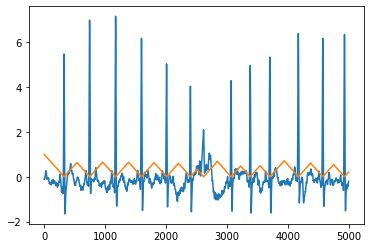

In [16]:
record_no = 18
plt.plot(patient_ecg_train[record_no,:,0])
plt.plot(dist_transform_train[record_no,:,0])

### Ensuring deterministicity through Random seeding


In [17]:
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
manualSeed = 4
random.seed(manualSeed)
# torch.manual_seed(manualSeed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed(manualSeed) 

### Setting the optimizer and Loss function

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [19]:


model = IncUNet()
inputs_signal = Input(shape=(5000,1), name='input-RR')
print(model(inputs_signal).shape)
model.summary()
# model.cuda()

# optimizer = optim.Adam(model.parameters(), lr = learn_rate)# Try out weight decay , 
# scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[90,190,450], gamma=0.1)

# criterion = nn.SmoothL1Loss()

(None, 5000, 1)
Model: "inc_u_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
seq1 (Sequential)            (None, 2499, 64)          36672     
_________________________________________________________________
seq2 (Sequential)            (None, 1250, 128)         176768    
_________________________________________________________________
sequential (Sequential)      (None, 1250, 128)         49792     
_________________________________________________________________
seq4 (Sequential)            (None, 624, 256)          753536    
_________________________________________________________________
sequential_1 (Sequential)    (None, 311, 512)          3071744   
_________________________________________________________________
seq6 (Sequential)            (None, 309, 512)          788992    
_________________________________________________________________
sequential_2 (Sequential)    (None, 155, 

### Initializing Tensorboard ###

In [20]:
# ### Using datetime to capture date time and write details into a text file
# date_time = str(datetime.datetime.now())
# date = date_time[:10]
# start_time = date_time[11:19]
# model_path = "saved_model/" + date + "__" + start_time + "/" 
# if not(os.path.exists('saved_model')): 
#   os.mkdir('saved_model')
# os.mkdir(model_path)
# log_file = './' + model_path + 'logfile.txt'
# log_data = open(log_file,'w+')
# settings = ' The Settings of the model are: Epoch:%d, LR:%f, BATCH_SIZE:%d Seed:%d\n'%(num_epochs,learn_rate,BATCH_SIZE,manualSeed)
# log_data.write(settings) 

### Training ###

In [21]:
opt = Adam(lr=0.05,decay=1e-5)
model.compile(optimizer=opt,loss='Huber')
learn_rate

0.05

In [22]:
model.fit(patient_ecg_train,dist_transform_train,
          validation_data=(patient_ecg_test,dist_transform_test),
          epochs=200,
          batch_size=64)

# patient_ecg_train = torch.load('train.pt')
# dist_transform_train = torch.load('dist_transform_train.pt')
# patient_ecg_test = torch.load('test.pt')
# dist_transform_test = torch.load('dist_transform_test.pt')

Epoch 1/200
31/31 [==============================] - 21s 666ms/step - loss: 14.1407 - val_loss: 83214899085312.0000
Epoch 2/200
31/31 [==============================] - 14s 458ms/step - loss: 0.1412 - val_loss: 9018.4248
Epoch 3/200
31/31 [==============================] - 14s 457ms/step - loss: 0.0616 - val_loss: 0.1897
Epoch 4/200
31/31 [==============================] - 14s 458ms/step - loss: 0.0516 - val_loss: 45.4976
Epoch 5/200
31/31 [==============================] - 14s 456ms/step - loss: 0.0303 - val_loss: 7.1283
Epoch 6/200
31/31 [==============================] - 14s 457ms/step - loss: 0.0321 - val_loss: 1.0952
Epoch 7/200
31/31 [==============================] - 14s 457ms/step - loss: 0.0329 - val_loss: 0.0662
Epoch 8/200
31/31 [==============================] - 14s 457ms/step - loss: 0.0320 - val_loss: 0.0452
Epoch 9/200
31/31 [==============================] - 14s 455ms/step - loss: 0.0290 - val_loss: 0.0320
Epoch 10/200
31/31 [==============================] - 14s 456ms/

In [23]:
# epoch_loss = []
# min_test_loss = 1000 ### Set a very high number
# best_epoch = 0
# for epoch in (range(num_epochs)):
#     print ('-'*40)
#     model.train()
#     print ('Epoch {}/{}'.format(epoch+1,num_epochs))
#     print ('-'*10)
#     net_loss = 0
    
#     for step,(x,y) in enumerate(trainloader):
        
#         print("Step no: {}/{}".format(step+1, len(trainloader)))
#         x,y = x.cuda(),y.cuda()
#         y_predict = model(x) 
        
#         ### Loss computation and Optimization ###
#         loss = criterion(y,y_predict)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         net_loss += loss
        
#     net_loss = net_loss/ (step + 1)
    
#     ### Logging ###
#     settings = "\nEpoch:{},Loss:{}".format(epoch,net_loss)
#     log_data.write(settings)
#     if(epoch == num_epochs - 1):
#         log_data.close()
    
#     print("Net loss is:", net_loss)
#     epoch_loss.append(net_loss.data)
    
#     scheduler.step()

#     ### Evaluation and saving best model ###    
#     if epoch % 10 == 0:
#         print ('-'*40)
#         print("..........Evaluation..........")
#         print("Epoch No is:", epoch)
#         model.eval()
    
#         with torch.no_grad():
#           net_test_loss = 0 
#           for step,(x,y) in enumerate(testloader): ### Use trainloader for AK2-11 ###
#               x,y = Variable(x.cuda()),Variable(y.cuda())
#               y_predict_test = model(x)
                           
#               test_loss = criterion(y_predict_test,y)                
#               net_test_loss += test_loss                 
            
#           net_test_loss /= step + 1 
            
#         ### Saving the best model based on the Minimum Loss
#         if net_test_loss < min_test_loss:
#           min_test_loss = net_test_loss
#           best_epoch = epoch
#           print("..........Saving the model..........")
#           torch.save(model.state_dict(),model_path+'Epoch'+str(epoch)+'.pt')
# print("base model in epoch: ", best_epoch)

### Evaluation



In [24]:
# best_model_path = model_path+'Epoch160.pt'
# print(best_model_path)
# SAVED_MODEL_PATH = "model_1.pt"
# # model.load_state_dict(torch.load(SAVED_MODEL_PATH))
# model.load_state_dict(torch.load(best_model_path))


In [25]:
y_pred_array = []
ecg = []


y_predict_test = model.predict(patient_ecg_test)

# test_loss = criterion(y_predict_test,y)                
# net_test_loss += test_loss   
# print('Step: {}, Loss: {} '.format(step,net_test_loss))

# ecg.append(patient_ecg_test)
y_pred_array = y_predict_test.reshape((-1,5000))#[:,0,:]
y_pred_array.shape,y_predict_test.shape

((64, 5000), (64, 5000, 1))

In [26]:
dist_transform_test.shape,patient_ecg_test.shape

((64, 5000, 1), (64, 5000, 1))

In [27]:
# patient_ecg_test = torch.load('test.pt')
# dist_transform_test = torch.load('dist_transform_test.pt')

### Post Processing ###

In [28]:
batch_no = 0
# y_pred_array = np.asarray(y_pred_array[batch_no])
ecg = patient_ecg_test#np.asarray(ecg[batch_no])[:,0,:]

peak_locs = []
for i in range(y_pred_array.shape[0]):
    peak_locs.append(scipy.signal.find_peaks(-y_pred_array[i,:],distance = 90,height = -0.2,prominence = 0.035)[0])

### Getting the amplitude values at valley location. 
y_roll_valleys = []
y = []
for j in range(len(peak_locs)):
    y = [ecg[j,i] for i in peak_locs[j]]
    y_roll_valleys.append(y)

### Plotting output ###

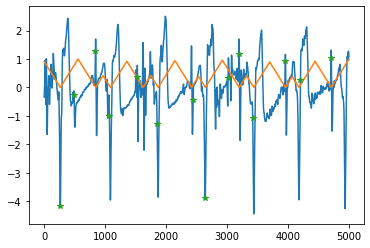

In [50]:
record_no = 35
plt.plot(ecg[record_no,:,0])
# plt.plot(y_pred_array[record_no])
plt.plot(dist_transform_test[record_no])
plt.plot(peak_locs[record_no], y_roll_valleys[record_no],'*')

In [30]:
y_pred_array[record_no],dist_transform_test[record_no]

(array([0.801913  , 0.7657761 , 0.75298524, ..., 0.74985224, 0.76605093,
        0.7445706 ], dtype=float32),
 array([[1.        ],
        [0.9954128 ],
        [0.9908257 ],
        ...,
        [0.5917431 ],
        [0.5963303 ],
        [0.60091746]], dtype=float32))

In [36]:
y_pred_array.shape, dist_transform_test.shape

((64, 5000), (64, 5000, 1))

In [41]:
loss = np.mean(np.abs(y_pred_array-dist_transform_test.reshape(64,5000)),axis=1)
loss.mean(),loss.min(),loss.max()

(0.06685272, 0.017215652, 0.22545017)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f21354be150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f21354bea10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f21354b6d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f21354c82d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f21354c8710>],
 'means': []}

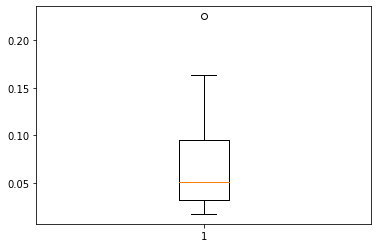

In [43]:
plt.boxplot(loss)

In [42]:
import pandas as pd
pd.DataFrame(loss).describe()

,0
count,64.000000
mean,0.066853
std,0.044667
min,0.017216
25%,0.031492
50%,0.050636
75%,0.095050
max,0.225450


In [55]:
model.save_weights('../../../../Models/RR/RR_app.hdf5')

In [56]:
tf.__version__

'2.2.0'